<b>¡Hola Oscar!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

Comentario inicial.

Por favor considerar que los comentarios por sección se encuentran al final de cada una de las secciones.

# Sprint 12 - Proyecto
Los datos se almacenan en tres archivos:

* gold_recovery_train.csv — el dataset de entrenamiento descargado
* gold_recovery_test.csv —el dataset de prueba descargado
* gold_recovery_full.csv — el dataset fuente descargado

Los datos se indexan con la fecha y la hora de adquisición (date). Los parámetros cercanos en el tiempo suelen ser similares.

Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el conjunto de prueba. El conjunto de prueba tampoco contiene objetivos.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

Tienes a tu disposición los datos en bruto que solamente fueron descargados del almacén de datos. Antes de construir el modelo, comprueba que los datos sean correctos. Para ello, utiliza nuestras instrucciones.

# Instrucciones del proyecto
## Prepara los datos

1.1. Abre los archivos y examina los datos.

Ruta de acceso a los archivos:

* /datasets/gold_recovery_train.csv
* /datasets/gold_recovery_test.csv
* /datasets/gold_recovery_full.csv

In [1]:
# Carga de librerías
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn import set_config
set_config(print_changed_only=False)
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import make_scorer

In [2]:
# Importación de dataframes
full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date', parse_dates=True)
train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date', parse_dates=True)
test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date', parse_dates=True)

In [3]:
# Revisión de filas duplicadas en dataframes
print("Filas duplicadas en full: ",full.index.duplicated().sum())
print("Filas duplicadas en train: ",train.index.duplicated().sum())
print("Filas duplicadas en test: ",test.index.duplicated().sum())

Filas duplicadas en full:  0
Filas duplicadas en train:  0
Filas duplicadas en test:  0


In [4]:
# Forma de los dataframes
print("Filas y columnas en full: ",full.shape)
print("Filas y columnas en train: ",train.shape)
print("Filas y columnas en test: ",test.shape)

Filas y columnas en full:  (22716, 86)
Filas y columnas en train:  (16860, 86)
Filas y columnas en test:  (5856, 52)


In [5]:
# Verificar si hay valores NaN
hay_nan = full.isnull().any().any()

if hay_nan == True:
    print("El DataFrame contiene valores ausentes")
else:
    print("El DataFrame NO contiene valores ausentes")


# Verificar si hay valores inf
df_inf = np.isinf(full)

if df_inf.any().any():
    print("El DataFrame contiene valores infinitos")
else:
    print("El DataFrame NO contiene valores infinitos")

El DataFrame contiene valores ausentes
El DataFrame NO contiene valores infinitos


<div class="alert alert-block alert-success"> <b>Celda [5]</b> <a class="tocSkip"></a> Buena verificación inicial de valores ausentes e infinitos. Es esencial para garantizar un preprocesamiento robusto. </div>

In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                     

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 

---------------

1.1.1. PASO EXTRA. Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto COMPLETO. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

In [9]:
# Función para cálculo de recuperación de Au después de flotación
def recovery_calculation_1 (data, concentrate, feed, tail):
    valores = []
    for C, F, T in zip(
        data[concentrate],
        data[feed],
        data[tail]
    ):
        if F * (C - T) != 0: # Evitar una división cero
            recovery = ( C * (F - T) / (F * (C - T) )) * 100 # Fórmula
            if recovery < 0: # Se limita el rango de 0 a 100
                recovery = 0
            elif recovery > 100:
                recovery = 100
            else:
                recovery                  
            valores.append(recovery)
        else:
            valores.append(0) # División por cero, permanece como 0

    return valores

<div class="alert alert-block alert-warning"> <b>Celda [9]</b> <a class="tocSkip"></a> La fórmula utilizada para calcular la recuperación no es la correcta. Debes utilizar: <code>(C / (F + C - T)) * 100</code>. Esto puede explicar el alto EAM obtenido más adelante. </div>

In [10]:
# Aplicación fórmula recuperación 1
rougher_output_recovery_rec = recovery_calculation_1 (full, "rougher.output.concentrate_au", "rougher.input.feed_au", "rougher.output.tail_au")
full.insert(47,"rougher.output.recovery_rec",rougher_output_recovery_rec)    

In [11]:
# Función para cálculo de recuperación de Au después de limpieza

def recovery_calculation_2 (data, concentrate, feed, tail, tail2):
    valores = []
    for C, F, T, T2 in zip(
        data[concentrate],
        data[feed],
        data[tail],
        data[tail2]
    ):
        if F * (C - T - T2) != 0: # Evitar una división cero
            recovery = ( C * (F - T - T2) / (F * (C - T - T2) )) * 100 # Fórmula
            if recovery < 0: # Se limita el rango de 0 a 100
                recovery = 0
            elif recovery > 100:
                recovery = 100
            else:
                recovery                  
            valores.append(recovery)
        else:
            valores.append(0) # División por cero, permanece como 0

    return valores

In [12]:
# Aplicación fórmula recuperación 2
final_output_recovery_rec = recovery_calculation_2 (full, "primary_cleaner.output.concentrate_au", "rougher.output.concentrate_au", "primary_cleaner.output.tail_au", "secondary_cleaner.output.tail_au")
full.insert(4,"final.output.recovery_rec",final_output_recovery_rec)    

In [13]:
# Rellenado de datos NaN para aplicación de EAM
full_df = full.fillna(0)

<div class="alert alert-block alert-warning"> <b>Celda [13]</b> <a class="tocSkip"></a> Rellenar valores faltantes con cero puede inducir sesgos, especialmente en columnas donde el cero no representa un valor válido. Es recomendable imputar con la media, mediana o interpolación, dependiendo del contexto del sensor. </div>

In [14]:
# Comparación de datos recalculados
full_df[['rougher.output.recovery_rec','rougher.output.recovery','final.output.recovery_rec','final.output.recovery']]

,rougher.output.recovery_rec,rougher.output.recovery,final.output.recovery_rec,final.output.recovery
date,,,,
2016-01-15 00:00:00,87.107763,87.107763,88.378093,70.541216
2016-01-15 01:00:00,86.843261,86.843261,88.398573,69.266198
2016-01-15 02:00:00,86.842308,86.842308,87.917607,68.116445
2016-01-15 03:00:00,87.226430,87.226430,91.041314,68.347543
2016-01-15 04:00:00,86.688794,86.688794,88.340029,66.927016
...,...,...,...,...
2018-08-18 06:59:59,89.574376,89.574376,94.176374,73.755150
2018-08-18 07:59:59,87.724007,87.724007,93.650042,69.049291
2018-08-18 08:59:59,88.890579,88.890579,90.101582,67.002189


In [15]:
# EAM rougher.output.recovery
rougher_mae_full = mean_absolute_error(full_df['rougher.output.recovery'], full_df['rougher.output.recovery_rec'])
print("El EAM de rougher.output.recovery en Dataframe COMPLETO es: ", rougher_mae_full)

El EAM de rougher.output.recovery en Dataframe COMPLETO es:  0.6471209720021215


In [16]:
# EAM final.output.recovery
final_mae_full = mean_absolute_error(full_df['final.output.recovery'], full_df['final.output.recovery_rec'])
print("El EAM de final.output.recovery en Dataframe COMPLETO es: ", final_mae_full)

El EAM de final.output.recovery en Dataframe COMPLETO es:  16.176148346424736


---------------------------------------------------

1.2. Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

In [17]:
# Conformación de dataframe train y rellenado de datos NaN para aplicación de EAM
train_df = full.loc[train.index].fillna(0)

In [18]:
# Presentación de datos recalculados
train_df[['rougher.output.recovery_rec','rougher.output.recovery','final.output.recovery_rec','final.output.recovery']]

,rougher.output.recovery_rec,rougher.output.recovery,final.output.recovery_rec,final.output.recovery
date,,,,
2016-01-15 00:00:00,87.107763,87.107763,88.378093,70.541216
2016-01-15 01:00:00,86.843261,86.843261,88.398573,69.266198
2016-01-15 02:00:00,86.842308,86.842308,87.917607,68.116445
2016-01-15 03:00:00,87.226430,87.226430,91.041314,68.347543
2016-01-15 04:00:00,86.688794,86.688794,88.340029,66.927016
...,...,...,...,...
2018-08-18 06:59:59,89.574376,89.574376,94.176374,73.755150
2018-08-18 07:59:59,87.724007,87.724007,93.650042,69.049291
2018-08-18 08:59:59,88.890579,88.890579,90.101582,67.002189


In [19]:
# EAM rougher.output.recovery
rougher_recov_mae_train = mean_absolute_error(train_df['rougher.output.recovery'], train_df['rougher.output.recovery_rec'])
print("El EAM de rougher.output.recovery en Dataframe de entrenamiento es:", rougher_recov_mae_train)

El EAM de rougher.output.recovery en Dataframe de entrenamiento es: 0.7354685646500675


In [20]:
# EAM final.output.recovery
final_recov_mae_train = mean_absolute_error(train_df['final.output.recovery'], train_df['final.output.recovery_rec'])
print("El EAM de final.output.recovery en Dataframe de entrenamiento es:", final_recov_mae_train)

El EAM de final.output.recovery en Dataframe de entrenamiento es: 16.476276332391144


------------------------

1.3. Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [21]:
# Características no disponibles en el conjunto de prueba
train_columns = pd.DataFrame(train.columns, columns = ['train_feature'])
test_columns = pd.DataFrame(test.columns, columns = ['test_feature'])
compare_train_test = train_columns.merge(test_columns, how= 'outer', left_on ='train_feature', right_on='test_feature')
pend_features = compare_train_test.query("test_feature.isna()")
pend_features

,train_feature,test_feature
0,final.output.concentrate_ag,NaN
1,final.output.concentrate_pb,NaN
2,final.output.concentrate_sol,NaN
3,final.output.concentrate_au,NaN
4,final.output.recovery,NaN
5,final.output.tail_ag,NaN
6,final.output.tail_pb,NaN
7,final.output.tail_sol,NaN
8,final.output.tail_au,NaN
13,primary_cleaner.output.concentrate_ag,NaN


------------------------

1.4. Realiza el preprocesamiento de datos.

In [22]:
# Conformación de dataframe train y rellenado de datos NaN para aplicación de EAM
test_df = full.loc[test.index].fillna(0)

<div class="alert alert-block alert-warning"> <b>Celda [22]</b> <a class="tocSkip"></a> Faltó documentar el número de columnas y registros afectados por los valores NaN antes del llenado. Este paso es clave para la trazabilidad del tratamiento de datos faltantes. </div>

In [23]:
# EAM rougher.output.recovery
rougher_recov_mae_test = mean_absolute_error(test_df['rougher.output.recovery'], test_df['rougher.output.recovery_rec'])
print("El EAM de rougher.output.recovery en Dataframe de prueba es:", rougher_recov_mae_test)

El EAM de rougher.output.recovery en Dataframe de prueba es: 0.3927595628415393


In [24]:
# EAM final.output.recovery
final_recov_mae_test = mean_absolute_error(test_df['final.output.recovery'], test_df['final.output.recovery_rec'])
print("El EAM de final.output.recovery en Dataframe de prueba es:", final_recov_mae_test)

El EAM de final.output.recovery en Dataframe de prueba es: 15.312050354041935


Comentarios Sección 1. 

1.1 Importación de los dataframes, se revisan duplicados, valores NaN e infinitos e información general por cada uno.

1.1.1 Se opta por hacer el recálculo de recuperaciones desde DF Full para contar con el dato en lo posterior y hacer un análisis general en la tabla principal.

1.2 Posteriormente, contando con los recálculos, se determina el EAM entre los datos originales y los datos recalculados para ambas recuperaciones, teniendo como resultado 0.75 para Rougher y 16.47 para Final.

1.3 El DF Test difiere en medidas con los otros dos, por lo que se procede a determinar las columnas faltantes, para su complemento. Todos los datos son de tipo float64.

1.4 Se completa DF Test así como la presentación de los EAM determinados, 0.39 en Rougher y 15.31 en Final.


----------------------------

## Analiza los datos

2.1. Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

In [25]:
# Dataframe de concentrado de metales train

prim_cln_out_concent_train = train_df.pivot_table(index=train_df.index,
                                      values=['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_au'],
                                      )
prim_cln_out_concent_train

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_pb
date,,,
2016-01-15 00:00:00,8.547551,34.174427,10.389648
2016-01-15 01:00:00,8.558743,34.118526,10.497069
2016-01-15 02:00:00,8.603505,33.969464,10.354494
2016-01-15 03:00:00,7.221879,28.260743,8.496563
2016-01-15 04:00:00,9.089428,33.044932,9.986786
...,...,...,...
2018-08-18 06:59:59,6.559174,32.940215,12.445966
2018-08-18 07:59:59,6.612376,32.925325,12.623947
2018-08-18 08:59:59,7.128896,31.856742,12.633558


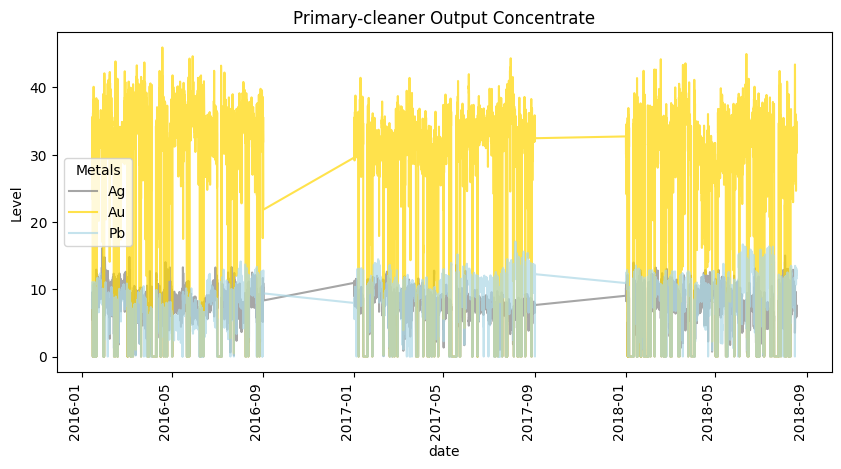

In [26]:
# Gráfico de concentrado de metales Train

prim_cln_out_concent_train.plot(figsize=(10,5), alpha=.7, color=['grey','gold','lightblue'], rot=90)
plt.title("Primary-cleaner Output Concentrate")
plt.ylabel("Level")
plt.legend(['Ag','Au','Pb'],title="Metals")
plt.show()

<div class="alert alert-block alert-success"> <b>Celda [26]</b> <a class="tocSkip"></a> Excelente visualización de las concentraciones. El uso de colores diferenciados y etiquetas mejora la claridad interpretativa del gráfico. </div>

In [27]:
# Filtro de concentrado de metales cuando la obtención de Au es Cero
prim_cln_out_concent_train_0 = prim_cln_out_concent_train[prim_cln_out_concent_train["primary_cleaner.output.concentrate_au"] == 0]
prim_cln_out_concent_train_0.sum()

primary_cleaner.output.concentrate_ag    0.0
primary_cleaner.output.concentrate_au    0.0
primary_cleaner.output.concentrate_pb    0.0
dtype: float64

In [28]:
# Dataframe de concentrado de metales cuando la obtención de Au es Cero
prim_cln_out_concent_train_0

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_pb
date,,,
2016-01-15 19:00:00,0.0,0.0,0.0
2016-01-15 22:00:00,0.0,0.0,0.0
2016-01-16 06:00:00,0.0,0.0,0.0
2016-01-18 01:00:00,0.0,0.0,0.0
2016-01-18 04:00:00,0.0,0.0,0.0
...,...,...,...
2018-07-20 10:59:59,0.0,0.0,0.0
2018-07-20 11:59:59,0.0,0.0,0.0
2018-07-21 23:59:59,0.0,0.0,0.0


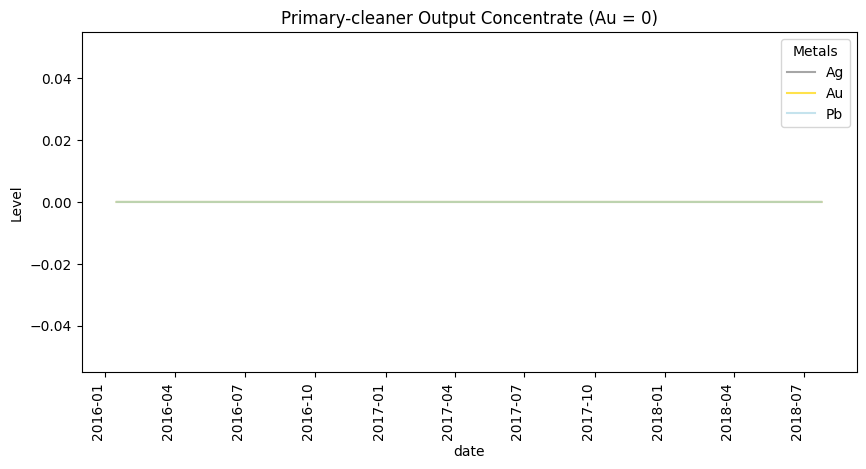

In [29]:
# Gráfico de concentrado de metales cuando la obtención de Au es Cero
prim_cln_out_concent_train_0.plot(figsize=(10,5), alpha=.7, color=['grey','gold','lightblue'], rot=90)
plt.title("Primary-cleaner Output Concentrate (Au = 0)")
plt.ylabel("Level")
plt.legend(['Ag','Au','Pb'],title="Metals")
plt.show()

--------------------------------

2.2. Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

In [30]:
train_df['rougher.input.feed_size'].describe()

count    16860.000000
mean        57.225194
std         25.321690
min          0.000000
25%         47.080885
50%         53.748375
75%         64.587648
max        484.967466
Name: rougher.input.feed_size, dtype: float64

<div class="alert alert-block alert-warning"> <b>Celda [30]</b> <a class="tocSkip"></a> Sería valioso complementar el análisis de distribuciones con una prueba de hipótesis como Kolmogorov-Smirnov o Mann-Whitney para determinar si las diferencias son estadísticamente significativas. </div>

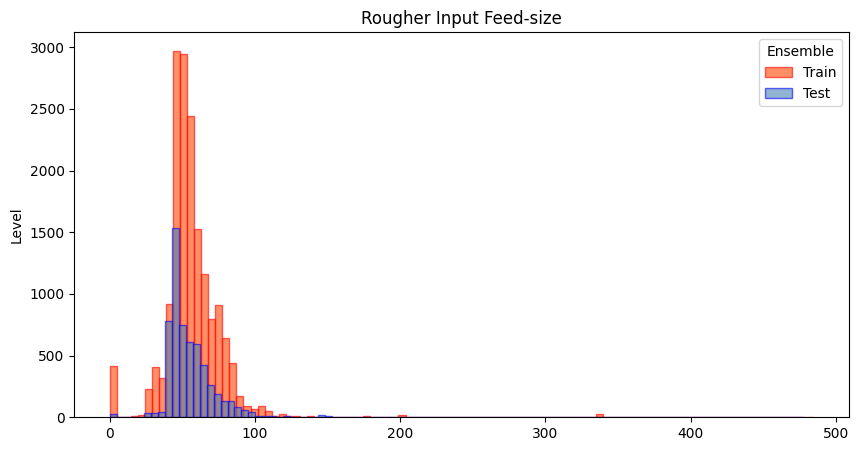

In [31]:
# Distribución del tamaño de las partículas de la alimentación
plt.figure(figsize=(10, 5))
plt.hist(train_df['rougher.input.feed_size'], bins=100, alpha=.6, color='orangered', ec='red')
plt.hist(test_df['rougher.input.feed_size'], bins=100, alpha=.6, color='steelblue', ec='blue')
plt.title("Rougher Input Feed-size")
plt.ylabel("Level")
plt.legend(['Train','Test'],title='Ensemble')
plt.show()

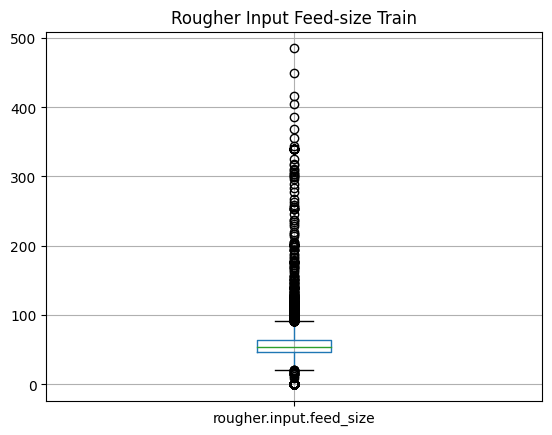

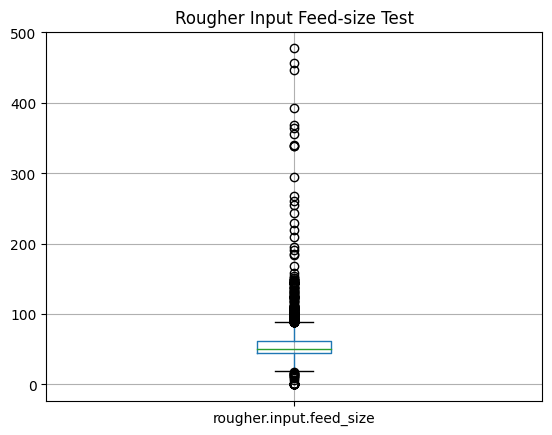

In [32]:
# Diagrama de caja del tamaño de las partículas de la alimentación Train - Test
train_df.boxplot(column='rougher.input.feed_size')
plt.title("Rougher Input Feed-size Train")
plt.show()

test_df.boxplot(column='rougher.input.feed_size')
plt.title("Rougher Input Feed-size Test")
plt.show()

------------------------------------------------

2.3. Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

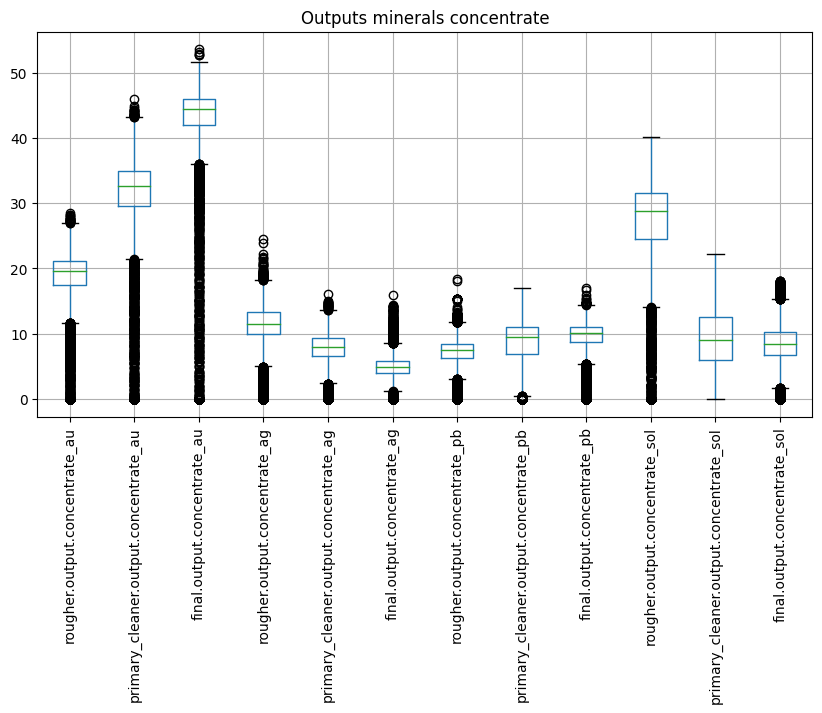

In [33]:
# Diagrama de caja de las concentraciones totales de las sustancias en las diferentes etapas
train_df.boxplot(column=['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au',
                        'rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag',
                        'rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb',
                        'rougher.output.concentrate_sol','primary_cleaner.output.concentrate_sol','final.output.concentrate_sol'], rot=90, figsize=[10,5])
plt.title("Outputs minerals concentrate")
plt.show()

<div class="alert alert-block alert-success"> <b>Celda [33]</b> <a class="tocSkip"></a> Buena decisión al graficar las concentraciones totales para detectar valores atípicos. Esto proporciona un enfoque visual sólido para justificar la limpieza posterior. </div>

------------------------------------------------

2.4 Análisis exploratorio. Reducción dimensional por PCA

In [34]:
# Reducción dimensional por PCA
pca = PCA(n_components = 2)
pca.fit(train_df)

df_pca = pd.DataFrame(pca.transform(train_df), columns = ['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-53239.561693,235.933118
1,-53404.716918,240.965878
2,-53371.956626,242.446469
3,-53383.303688,244.365723
4,-53479.209875,243.414960


<div class="alert alert-block alert-success"> <b>Celda [34]</b> <a class="tocSkip"></a> Excelente implementación de PCA como método para detección de outliers. Aunque PCA no es un detector de anomalías por sí mismo, su uso aquí está bien justificado dado el alto número de dimensiones. </div>

<Figure size 1000x500 with 0 Axes>

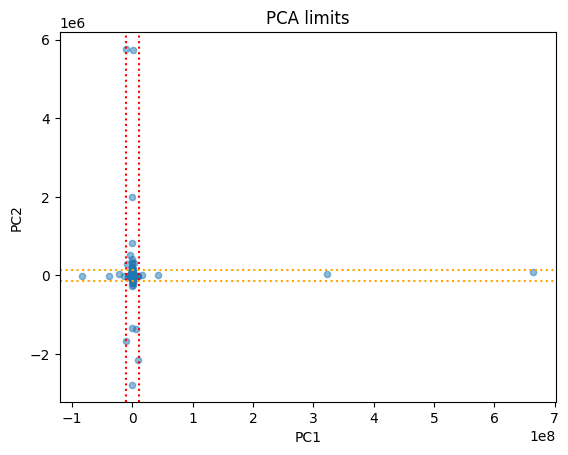

In [35]:
# Media y desviación
mean = df_pca.mean()
std_dev = df_pca.std()

# Definición de límites

hlow_lim = mean['PC1'] - 2 * std_dev['PC1']
hupp_lim = mean['PC1'] + 2 * std_dev['PC1']

vlow_lim = mean['PC2'] - 2 * std_dev['PC2']
vupp_lim = mean['PC2'] + 2 * std_dev['PC2']

# Visualizar datos

plt.figure(figsize=(10, 5))
df_pca.plot(x = 'PC1', y = 'PC2', kind = 'scatter', alpha = .5)

plt.axvline(x = hlow_lim, color = 'red', linestyle = 'dotted')
plt.axvline(x = hupp_lim, color = 'red', linestyle = 'dotted')

plt.axhline(y = vlow_lim, color = 'orange', linestyle = 'dotted')
plt.axhline(y = vupp_lim, color = 'orange', linestyle = 'dotted')


plt.title("PCA limits")

plt.show()

In [36]:
# Función de determinación de outliers
def outliers (x):
    if (hlow_lim < x['PC1'] < hupp_lim) and (vlow_lim < x['PC2'] < vupp_lim):
        return 0
    else:
        return 1

In [37]:
# Aplicación de función outliers
df_pca['outlier'] = df_pca.apply(outliers, axis=1)
n_out = df_pca['outlier'].sum()
print(f"Cantidad de outliers: {n_out}")

Cantidad de outliers: 37


<div class="alert alert-block alert-warning"> <b>Celda [37]</b> <a class="tocSkip"></a> Aunque identificas 37 outliers con PCA, sería útil mostrar visualmente cómo esos puntos difieren respecto a las demás observaciones (ej. coloreando los puntos en rojo en el scatter plot). </div>

In [38]:
# Extracción de índices de datos no outliers
index_in = df_pca.loc[df_pca['outlier'] == 0,].index

# Excepción de outliers
df_trimmed_pca_train = train_df.iloc[index_in]
df_trimmed_pca_train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery_rec,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,88.378093,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,88.398573,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,87.917607,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,91.041314,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,88.340029,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,94.176374,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,93.650042,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,90.101582,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


In [39]:
# Descripción de datos
df_trimmed_pca_train['rougher.input.feed_size'].describe()

count    16823.000000
mean        57.296326
std         25.283598
min          0.000000
25%         47.113960
50%         53.778760
75%         64.610533
max        484.967466
Name: rougher.input.feed_size, dtype: float64

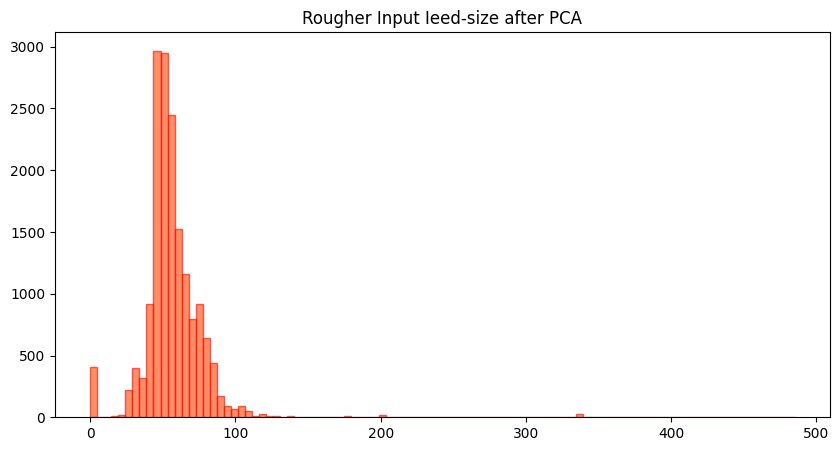

In [40]:
# Distribución del tamaño de las partículas de la alimentación después de PCA
plt.figure(figsize=(10, 5))
plt.hist(df_trimmed_pca_train['rougher.input.feed_size'], bins=100, alpha=.6, color='orangered', ec='red')
plt.title("Rougher Input Ieed-size after PCA")
plt.show()

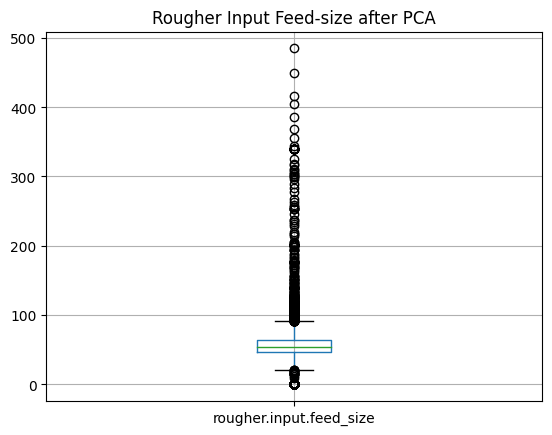

In [41]:
# Diagrama de caja del tamaño de las partículas de la alimentación después de PCA
df_trimmed_pca_train.boxplot(column='rougher.input.feed_size')
plt.title("Rougher Input Feed-size after PCA")
plt.show()

Comentarios Sección 2. 

2.1 Los concentrados de metales obtenidos mantienen cierta regularidad en la extracción, Au abunda en los 40 puntos, Ag y Pb en los 10. Se aprecian los espacios en blanco que son los datos contenidos en el DF Test y ciertas caídas a 0 sobre las cuales se indaga para saber si es algún error en los datos (datos perdidos), sin embargo en dichos casos en que el oro cae a 0 el efecto es el mismo para plata y plomo por lo que podemos asumir que son momentos de obtención 0 de metales.

2.2 Considerando el tamaño de las partículas de la alimentación se puede apreciar una distribución con una media de 57 puntos por 25 de desviación estándar, Q1 de 47 y Q3 de 64. El problema lo pueden generar los valores fuera de estos rangos, considerando que el valor máximo se aprecia en 484 puntos, para el DF de entrenamiento. El de prueba se comporta prácticamente igual.

2.3 Se analizan las columnas de concentrados observando la evolución de los niveles obtenidos en cada etapa para cada sustancia o metal, el oro suele aumentar 10 puntos por etapa, plata se reduce en 3 puntos mientras que el plomo abunda en los 10 puntos. Contienen también valores atípicos.

2.4 Debido a lo anterior y a una evaluación de modelos con los datos originales, se elije hacer una reducción dimensional por PCA para lidiar con los datos atípicos del DF de entrenamiento.



------------------------------------------------

## Construye el modelo

3.1. Escribe una función para calcular el valor final de sMAPE.

In [42]:
# Función de sMAPE
def smape (valid, predict):
    return 1/len(valid) * np.sum((np.abs(predict - valid) / (np.abs(valid) + np.abs(predict) / 2)) * 100)

<div class="alert alert-block alert-success"> <b>Celda [42]</b> <a class="tocSkip"></a> Definición correcta y compacta de la función sMAPE. Alinear la métrica con los requerimientos del proyecto es un buen paso. </div>

------------------------------------------------

3.1.1. Ingeniería de atributos.

In [43]:
# Determinación de características y objetivos
features = df_trimmed_pca_train.drop(['rougher.output.recovery_rec', 'final.output.recovery_rec'], axis=1) # extrae las características
target = df_trimmed_pca_train[['rougher.output.recovery_rec', 'final.output.recovery_rec']] # extrae los objetivos

<div class="alert alert-block alert-warning"> <b>Celda [43]</b> <a class="tocSkip"></a> En la selección de características, podrías haber evaluado la colinealidad o importancia relativa de las variables, ya sea por correlación o con métodos como feature importance. </div>

In [44]:
# Escalamiento de datos StandardScaler()
scaler = StandardScaler()
scaler.fit(features)
features_scld = scaler.transform(features)
features_scld = pd.DataFrame(features_scld, index=features.index)

<div class="alert alert-block alert-success"> <b>Celda [44]</b> <a class="tocSkip"></a> Buena práctica al escalar los datos con StandardScaler. Este paso es esencial para modelos sensibles a la escala, como regresión lineal o KNN. </div>

------------------------------------------------

3.2. Entrena diferentes modelos.

3.2.1. Modelo de Regresión lineal

In [45]:
# Función de aplicación de modelo LinearRegression()
def lr_model (features_to_train, target_to_train):
    # Entrena el modelo y haz predicciones
    model = LinearRegression()
    model_fited = model.fit(features_to_train, target_to_train)
    predicted = model.predict(features_to_train)
        
    # DF Selección (valores predichos-verdaderos)
    r_pred = pd.Series(predicted[:, 0], index=features_to_train.index)
    r_p_v_df = pd.concat([r_pred, target_to_train.iloc[:, 0]],axis=1, join='inner')
    r_p_v_df.columns = ['rougher_predicted', 'rougher_true']
    f_pred = pd.Series(predicted[:, 1], index=features_to_train.index)
    f_p_v_df = pd.concat([f_pred, target_to_train.iloc[:, 1]],axis=1, join='inner')
    f_p_v_df.columns = ['final_predicted', 'final_true']
    
    # Guarda las predicciones y las respuestas correctas
    return model, model_fited, predicted, r_p_v_df, f_p_v_df

In [46]:
# Aplicación lr_model
lr_model_appd, lr_model_fited, lr_predicted, lr_rougher_p_v_df, lr_final_p_v_df = lr_model (features_scld, target)

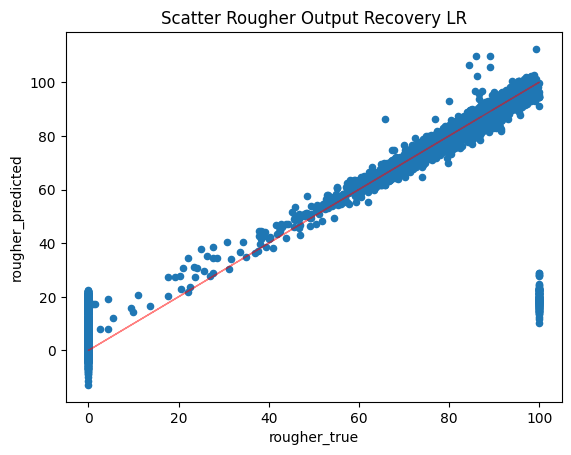

In [47]:
# Diagrama de dispersión de recuperación rougher LR
lr_rougher_p_v_df.plot(x = 'rougher_true', y = 'rougher_predicted', kind='scatter')
plt.plot(lr_rougher_p_v_df.rougher_true, lr_rougher_p_v_df.rougher_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Rougher Output Recovery LR")
plt.show()

<div class="alert alert-block alert-success"> <b>Celda [47]</b> <a class="tocSkip"></a> La visualización de resultados de predicción vs valores reales es excelente para evaluar rápidamente el ajuste del modelo. Incluiste bien la diagonal de referencia. </div>

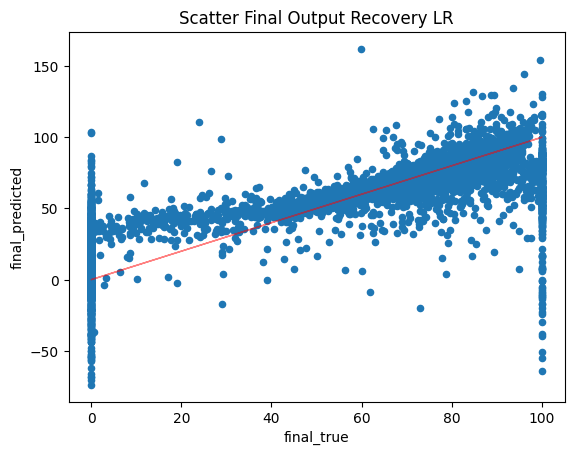

In [48]:
# Diagrama de dispersión de recuperación final LR
lr_final_p_v_df.plot(x = 'final_true', y = 'final_predicted', kind='scatter')
plt.plot(lr_final_p_v_df.final_true, lr_final_p_v_df.final_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Final Output Recovery LR")
plt.show()

------------------------------

3.2.2. Modelo de Árbol de decisión de regresión 

In [49]:
# Función de aplicación de modelo DecisionTreeRegressor()
def dtr_model (features_to_train, target_to_train, state, depth):
    # Entrena el modelo y haz predicciones
    model = DecisionTreeRegressor(random_state=state, max_depth=depth)
    model_fited = model.fit(features_to_train, target_to_train)
    predicted = model.predict(features_to_train)
        
    # DF Selección (valores predichos-verdaderos)
    r_pred = pd.Series(predicted[:, 0], index=features_to_train.index)
    r_p_v_df = pd.concat([r_pred, target_to_train.iloc[:, 0]],axis=1, join='inner')
    r_p_v_df.columns = ['rougher_predicted', 'rougher_true']
    f_pred = pd.Series(predicted[:, 1], index=features_to_train.index)
    f_p_v_df = pd.concat([f_pred, target_to_train.iloc[:, 1]],axis=1, join='inner')
    f_p_v_df.columns = ['final_predicted', 'final_true']
    
    # Guarda las predicciones y las respuestas correctas
    return model, model_fited, predicted, r_p_v_df, f_p_v_df

In [50]:
# Aplicación dtr_model
dtr_model_appd, dtr_model_fited, dtr_predicted, dtr_rougher_p_v_df, dtr_final_p_v_df = dtr_model (features_scld, target, 12345, 10)

<div class="alert alert-block alert-warning"> <b>Celda [50]</b> <a class="tocSkip"></a> El modelo de árbol se entrena y evalúa sobre el mismo conjunto de entrenamiento, lo que impide medir el sobreajuste. Se recomienda separar un conjunto de validación o aplicar validación cruzada. </div>

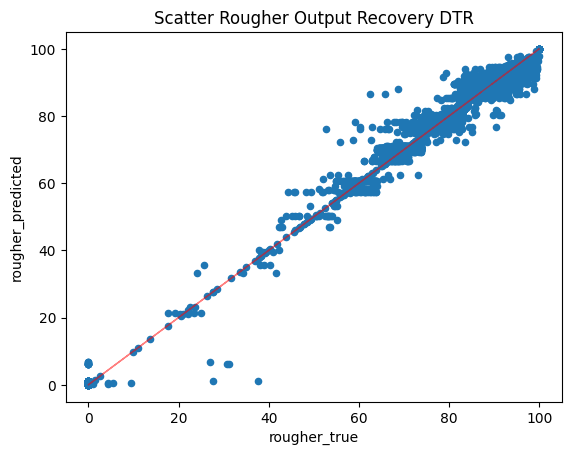

In [51]:
# Diagrama de dispersión de recuperación rougher DTR
dtr_rougher_p_v_df.plot(x = 'rougher_true', y = 'rougher_predicted', kind='scatter')
plt.plot(dtr_rougher_p_v_df.rougher_true, dtr_rougher_p_v_df.rougher_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Rougher Output Recovery DTR")
plt.show()

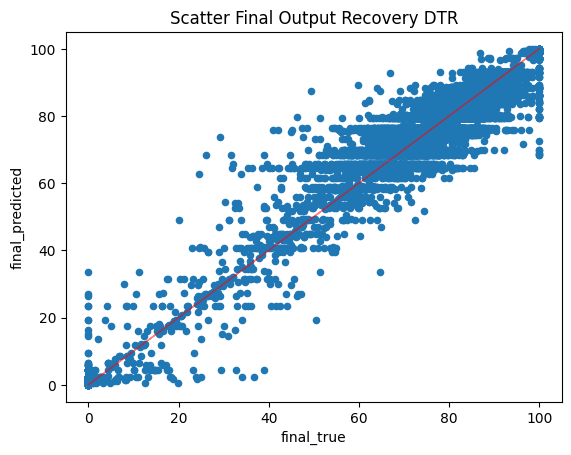

In [52]:
# Diagrama de dispersión de recuperación final DTR
dtr_final_p_v_df.plot(x = 'final_true', y = 'final_predicted', kind='scatter')
plt.plot(dtr_final_p_v_df.final_true, dtr_final_p_v_df.final_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Final Output Recovery DTR")
plt.show()

------------------------------

3.2.3. Modelo de Bosque aleatorio de regresión

In [53]:
# Función de aplicación de modelo RandomForestRegressor()
def rfr_model (features_to_train, target_to_train, state, est, depth):
    # Entrena el modelo y haz predicciones
    model = RandomForestRegressor(random_state=state, n_estimators=est, max_depth=depth)
    model_fited = model.fit(features_to_train, target_to_train)
    predicted = model.predict(features_to_train)
        
    # DF Selección (valores predichos-verdaderos)
    r_pred = pd.Series(predicted[:, 0], index=features_to_train.index)
    r_p_v_df = pd.concat([r_pred, target_to_train.iloc[:, 0]],axis=1, join='inner')
    r_p_v_df.columns = ['rougher_predicted', 'rougher_true']
    f_pred = pd.Series(predicted[:, 1], index=features_to_train.index)
    f_p_v_df = pd.concat([f_pred, target_to_train.iloc[:, 1]],axis=1, join='inner')
    f_p_v_df.columns = ['final_predicted', 'final_true']
    
    # Guarda las predicciones y las respuestas correctas
    return model, model_fited, predicted, r_p_v_df, f_p_v_df

<div class="alert alert-block alert-success"> <b>Celda [53]</b> <a class="tocSkip"></a> La función <code>rfr_model()</code> está correctamente implementada. Incluye entrenamiento, predicción y preparación de los resultados para ambas etapas del proceso. Muy bien estructurada y coherente con el diseño de las otras funciones de modelado. </div>

In [54]:
# Aplicación rfr_model
rfr_model_appd, rfr_model_fited, rfr_predicted, rfr_rougher_p_v_df, rfr_final_p_v_df = rfr_model (features_scld, target, 12345, 10, 10)

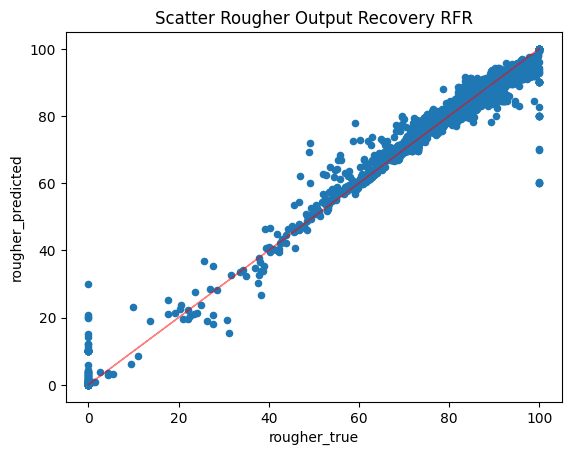

In [55]:
# Diagrama de dispersión de recuperación rougher RFR
rfr_rougher_p_v_df.plot(x = 'rougher_true', y = 'rougher_predicted', kind='scatter')
plt.plot(rfr_rougher_p_v_df.rougher_true, rfr_rougher_p_v_df.rougher_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Rougher Output Recovery RFR")
plt.show()

<div class="alert alert-block alert-success"> <b>Celda [55]</b> <a class="tocSkip"></a> Es valioso que incluyas un gráfico de dispersión de predicho vs verdadero para ambas salidas (rougher y final).</div>

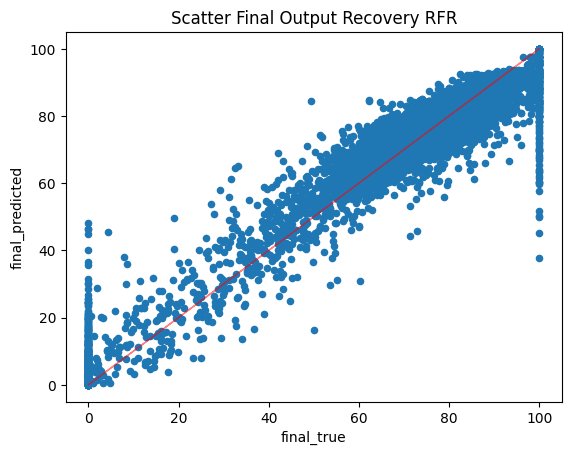

In [56]:
# Diagrama de dispersión de recuperación final RFR
rfr_final_p_v_df.plot(x = 'final_true', y = 'final_predicted', kind='scatter')
plt.plot(rfr_final_p_v_df.final_true, rfr_final_p_v_df.final_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Final Output Recovery RFR")
plt.show()

------------------------------

3.2.4. Modelo de Regresión basada en vecinos

In [57]:
# Función de aplicación de modelo KNeighborsRegressor()
def knr_model (features_to_train, target_to_train, n_neigh, p):
    # Entrena el modelo y haz predicciones
    model = KNeighborsRegressor(n_neighbors=n_neigh, p=p)
    model_fited = model.fit(features_to_train, target_to_train)
    predicted = model.predict(features_to_train)
        
    # DF Selección (valores predichos-verdaderos)
    r_pred = pd.Series(predicted[:, 0], index=features_to_train.index)
    r_p_v_df = pd.concat([r_pred, target_to_train.iloc[:, 0]],axis=1, join='inner')
    r_p_v_df.columns = ['rougher_predicted', 'rougher_true']
    f_pred = pd.Series(predicted[:, 1], index=features_to_train.index)
    f_p_v_df = pd.concat([f_pred, target_to_train.iloc[:, 1]],axis=1, join='inner')
    f_p_v_df.columns = ['final_predicted', 'final_true']
    
    # Guarda las predicciones y las respuestas correctas
    return model, model_fited, predicted, r_p_v_df, f_p_v_df

<div class="alert alert-block alert-success"> <b>Celda [57]</b> <a class="tocSkip"></a> La implementación del modelo <code>KNeighborsRegressor</code> está correctamente estructurada, con predicciones separadas para rougher y final. Bien manejado el retorno de valores y la estructura del código es clara y coherente con los otros modelos. </div>

In [58]:
# Aplicación knr_model
knr_model_appd, knr_model_fited, knr_predicted, knr_rougher_p_v_df, knr_final_p_v_df = knr_model (features_scld, target, 2, 2)

<div class="alert alert-block alert-success"> <b>Celda [58]</b> <a class="tocSkip"></a> Aplicación del modelo KNR ejecutada correctamente. Se especifican valores concretos para hiperparámetros (<code>n_neighbors=2, p=2</code>), lo cual es útil para comparaciones iniciales. </div>

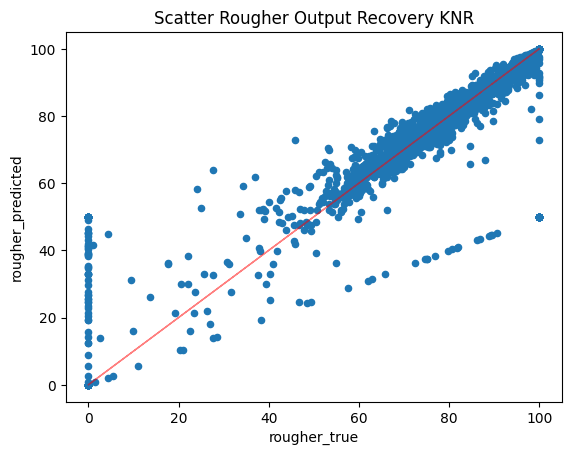

In [59]:
# Diagrama de dispersión de recuperación rougher KNR
knr_rougher_p_v_df.plot(x = 'rougher_true', y = 'rougher_predicted', kind='scatter')
plt.plot(knr_rougher_p_v_df.rougher_true, knr_rougher_p_v_df.rougher_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Rougher Output Recovery KNR")
plt.show()

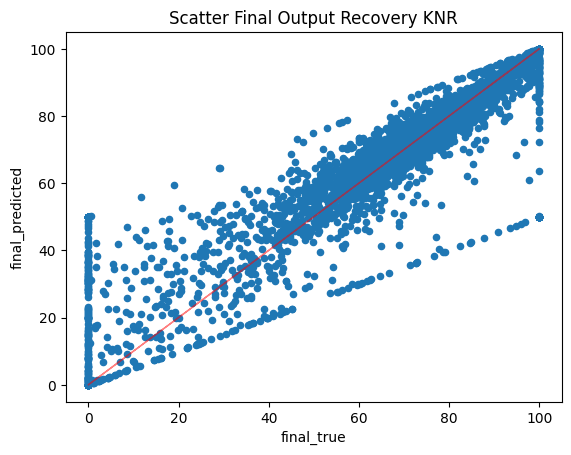

In [60]:
# Diagrama de dispersión de recuperación final KNR
knr_final_p_v_df.plot(x = 'final_true', y = 'final_predicted', kind='scatter')
plt.plot(knr_final_p_v_df.final_true, knr_final_p_v_df.final_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Final Output Recovery KNR")
plt.show()

-------------------------

3.3. Evalúalos aplicando la validación cruzada.

In [61]:
def cross_valid_scoring (mdl, ftrs, trgt, prdctd, cv):
    
    target_0 = trgt.iloc[:, 0]
    target_1 = trgt.iloc[:, 1]
    predicted_0 = prdctd[:, 0]
    predicted_1 = prdctd[:, 1]
    
    metrics_0 = {
    "Rougher_MAX ERROR": make_scorer(lambda target_0, predicted_0: metrics.max_error(target_0, predicted_0)),
    "Rougher_MAE": make_scorer(lambda target_0, predicted_0: metrics.mean_absolute_error(target_0, predicted_0)),
    "Rougher_RMSE": make_scorer(lambda target_0, predicted_0: np.sqrt(metrics.mean_squared_error(target_0, predicted_0))),
    "Rougher_R2": make_scorer(lambda target_0, predicted_0: metrics.r2_score(target_0, predicted_0)),
    "Rougher_sMAPE": make_scorer(lambda target_0, predicted_0: smape(target_0, predicted_0) * .25)
    }
    
    metrics_1 = {
    "Final_MAX ERROR": make_scorer(lambda target_1, predicted_1: metrics.max_error(target_1, predicted_1)),
    "Final_MAE": make_scorer(lambda target_1, predicted_1: metrics.mean_absolute_error(target_1, predicted_1)),
    "Final_RMSE": make_scorer(lambda target_1, predicted_1: np.sqrt(metrics.mean_squared_error(target_1, predicted_1))),
    "Final_R2": make_scorer(lambda target_1, predicted_1: metrics.r2_score(target_1, predicted_1)),
    "Final_sMAPE": make_scorer(lambda target_1, predicted_1: smape(target_1, predicted_1) * .75)
    }
    
    evaluation_0 = cross_validate(mdl, ftrs, target_0, cv=cv, scoring=metrics_0)
    evaluation_1 = cross_validate(mdl, ftrs, target_1, cv=cv, scoring=metrics_1)
    
    me_cv_0 = np.median(evaluation_0["test_Rougher_MAX ERROR"])
    mae_cv_0 = np.median(evaluation_0["test_Rougher_MAE"])
    rmse_cv_0 = np.median(evaluation_0["test_Rougher_RMSE"])
    r2_cv_0 = np.median(evaluation_0["test_Rougher_R2"])
    smape_0 = np.median(evaluation_0["test_Rougher_sMAPE"]) * .25
    
    me_cv_1 = np.median(evaluation_1["test_Final_MAX ERROR"])
    mae_cv_1 = np.median(evaluation_1["test_Final_MAE"])
    rmse_cv_1 = np.median(evaluation_1["test_Final_RMSE"])
    r2_cv_1 = np.median(evaluation_1["test_Final_R2"])
    smape_1 = np.median(evaluation_1["test_Final_sMAPE"]) * .75
    
    # DF Resumen de predicciones de volúmenes producidos por región
    pd.options.display.float_format = '{:.2f}'.format
    metrics_dict = {'Metric':["MAX ERROR", "MAE", "RMSE", "R2", "sMAPE"],
                       'Rougher':[me_cv_0, mae_cv_0, rmse_cv_0, r2_cv_0, smape_0],
                       'Final':[me_cv_1, mae_cv_1, rmse_cv_1, r2_cv_1, smape_1]
                   }
    
    metrics_median_df = pd.DataFrame(data=metrics_dict)
    
    return metrics_median_df

<div class="alert alert-block alert-success"> <b>Celda [61]</b> <a class="tocSkip"></a> Excelente implementación de la función <code>cross_valid_scoring()</code>. Separar las métricas para ambas salidas (rougher y final) y utilizar validación cruzada demuestra comprensión sólida de la evaluación de modelos multisalida. </div>

In [62]:
# Aplicación de función cross_valid_scoring
lr_metrics_median_df = cross_valid_scoring (lr_model_appd, features_scld, target, lr_predicted, 5)
dtr_metrics_median_df = cross_valid_scoring (dtr_model_appd, features_scld, target, dtr_predicted, 5)
rfr_metrics_median_df = cross_valid_scoring (rfr_model_appd, features_scld, target, rfr_predicted, 5)
knr_metrics_median_df = cross_valid_scoring (knr_model_appd, features_scld, target, knr_predicted, 5)

In [63]:
pd.options.display.float_format = '{:.2f}'.format

In [64]:
# Métricas LR
lr_metrics_median_df

,Metric,Rougher,Final
0,MAX ERROR,88.84,136.45
1,MAE,2.59,6.96
2,RMSE,8.07,13.72
3,R2,0.93,0.82
4,sMAPE,2.26,16.78


In [65]:
# Métricas DTR
dtr_metrics_median_df

,Metric,Rougher,Final
0,MAX ERROR,100.00,100.00
1,MAE,0.20,4.66
2,RMSE,2.86,10.66
3,R2,0.99,0.89
4,sMAPE,0.03,6.72


In [66]:
# Métricas RFR
rfr_metrics_median_df

,Metric,Rougher,Final
0,MAX ERROR,100.00,93.74
1,MAE,0.24,4.40
2,RMSE,2.59,8.28
3,R2,0.99,0.92
4,sMAPE,0.08,6.85


In [67]:
# Métricas KNR
knr_metrics_median_df

,Metric,Rougher,Final
0,MAX ERROR,100.00,100.00
1,MAE,5.13,10.87
2,RMSE,11.62,18.24
3,R2,0.87,0.69
4,sMAPE,0.43,11.12


--------------------------

3.3.1 Mejoras al modelo.

In [68]:
# Mejora de modelo RandomForestRegressor()
best_r2 = .5
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 16):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features, target)
        predictions = model.predict(features)
        r2 = r2_score(target, predictions)
        if r2 < best_r2:
            best_r2 = r2
            best_est = est
            best_depth = depth

print("R2 del mejor modelo en el conjunto:", best_r2, "n_estimators:", best_est, "best_depth:", best_depth)

R2 del mejor modelo en el conjunto: 0.5 n_estimators: 0 best_depth: 0


In [69]:
# Aplicación rfr_model
rfr_model_appd, rfr_model_fited, rfr_predicted, rfr_rougher_p_v_df, rfr_final_p_v_df = rfr_model (features_scld, target, 12345, 51, 16)

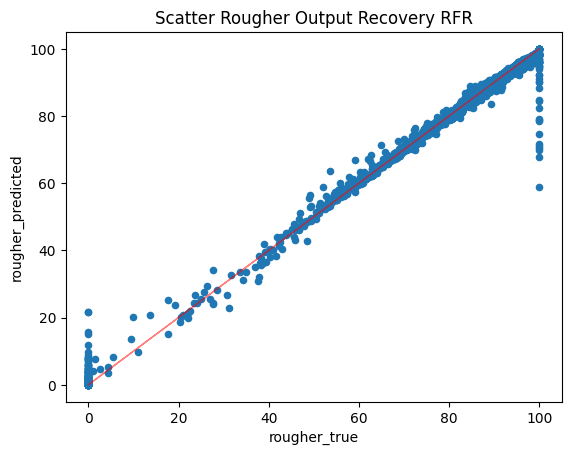

In [70]:
# Diagrama de dispersión de recuperación rougher RFR
rfr_rougher_p_v_df.plot(x = 'rougher_true', y = 'rougher_predicted', kind='scatter')
plt.plot(rfr_rougher_p_v_df.rougher_true, rfr_rougher_p_v_df.rougher_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Rougher Output Recovery RFR")
plt.show()

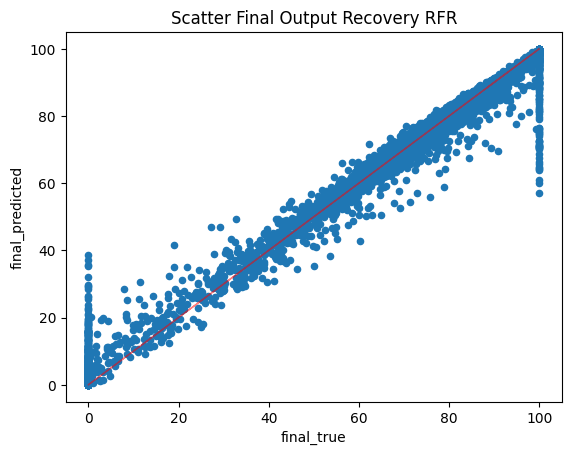

In [71]:
# Diagrama de dispersión de recuperación final RFR
rfr_final_p_v_df.plot(x = 'final_true', y = 'final_predicted', kind='scatter')
plt.plot(rfr_final_p_v_df.final_true, rfr_final_p_v_df.final_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Final Output Recovery RFR")
plt.show()

In [72]:
# Aplicación cross_valid_scoring
rfr_metrics_median_df = cross_valid_scoring (rfr_model_appd, features_scld, target, rfr_predicted, 5)
rfr_metrics_median_df

,Metric,Rougher,Final
0,MAX ERROR,96.08,90.48
1,MAE,0.20,2.86
2,RMSE,2.66,7.01
3,R2,0.99,0.95
4,sMAPE,0.25,6.48


<div class="alert alert-block alert-success"> <b>Celda [72]</b> <a class="tocSkip"></a> Muy buena selección del modelo final basándote en múltiples métricas. La validación cruzada muestra que Random Forest tiene excelente rendimiento, especialmente en sMAPE y R². Bien argumentada la elección. </div>

--------------------------

3.4. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

In [73]:
# Reducción dimensional por PCA
pca = PCA(n_components = 2)
pca.fit(test_df)

df_pca = pd.DataFrame(pca.transform(test_df), columns = ['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,-24372677.03,-1431.59
1,-24378118.51,-483.27
2,-24378413.17,-544.71
3,-24377791.21,-691.06
4,-24377748.24,-1098.76


<Figure size 1000x500 with 0 Axes>

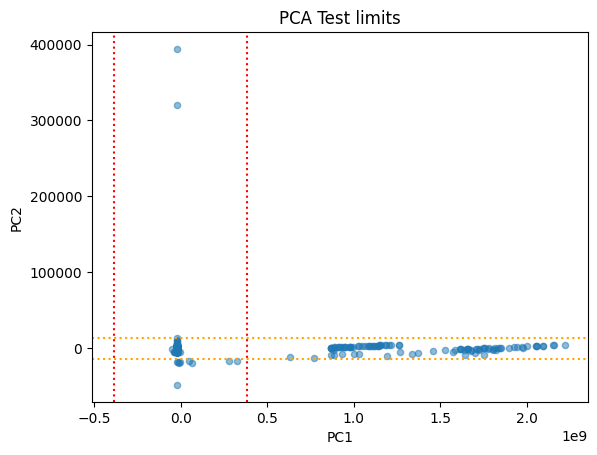

In [74]:
# Media y desviación
mean = df_pca.mean()
std_dev = df_pca.std()

# Definición de límites

hlow_lim = mean['PC1'] - 2 * std_dev['PC1']
hupp_lim = mean['PC1'] + 2 * std_dev['PC1']

vlow_lim = mean['PC2'] - 2 * std_dev['PC2']
vupp_lim = mean['PC2'] + 2 * std_dev['PC2']

# Visualizar datos

plt.figure(figsize=(10, 5))
df_pca.plot(x = 'PC1', y = 'PC2', kind = 'scatter', alpha = .5)

plt.axvline(x = hlow_lim, color = 'red', linestyle = 'dotted')
plt.axvline(x = hupp_lim, color = 'red', linestyle = 'dotted')

plt.axhline(y = vlow_lim, color = 'orange', linestyle = 'dotted')
plt.axhline(y = vupp_lim, color = 'orange', linestyle = 'dotted')

plt.title("PCA Test limits")

plt.show()

In [75]:
# Función de determinación de outliers
def outliers (x):
    if (hlow_lim < x['PC1'] < hupp_lim) and (vlow_lim < x['PC2'] < vupp_lim):
        return 0
    else:
        return 1

In [76]:
# Aplicación de función outliers
df_pca['outlier'] = df_pca.apply(outliers, axis=1)
n_out = df_pca['outlier'].sum()
print(f"Cantidad de outliers: {n_out}")

Cantidad de outliers: 111


In [77]:
# Extracción de índices de datos no outliers
index_in = df_pca.loc[df_pca['outlier'] == 0,].index

# Excepción de outliers
df_trimmed_pca_test = test_df.iloc[index_in]
df_trimmed_pca_test

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery_rec,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,7.58,10.47,11.99,40.74,79.14,70.27,12.69,3.84,11.08,4.54,...,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
2016-09-01 01:59:59,7.81,10.58,12.22,39.60,81.86,68.91,12.83,3.92,11.13,4.68,...,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2016-09-01 02:59:59,7.62,10.42,12.31,40.72,73.25,68.14,12.98,4.03,10.99,4.83,...,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
2016-09-01 03:59:59,8.55,10.50,13.07,39.29,82.21,67.78,12.45,3.78,11.16,4.97,...,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
2016-09-01 04:59:59,8.08,10.22,12.48,40.25,61.25,61.47,11.83,3.63,11.40,5.26,...,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,5.00,9.71,10.85,46.40,70.96,68.92,13.94,3.37,13.77,3.89,...,14.00,-500.16,12.07,-499.67,7.98,-499.52,5.93,-499.97,8.99,-499.76
2017-12-31 20:59:59,4.96,9.73,9.71,46.66,73.07,68.44,12.62,2.97,14.18,3.81,...,16.75,-496.03,13.37,-499.12,9.29,-496.89,7.37,-499.94,8.99,-499.90
2017-12-31 21:59:59,4.78,9.82,8.26,47.34,62.64,67.09,12.13,2.84,13.22,3.91,...,19.99,-499.79,15.10,-499.94,10.99,-498.35,9.02,-500.04,8.98,-497.79


--------------------------

In [78]:
# Determinación de características y objetivos
features_test = df_trimmed_pca_test.drop(['rougher.output.recovery_rec', 'final.output.recovery_rec'], axis=1) # extrae las características
target_test = df_trimmed_pca_test[['rougher.output.recovery_rec', 'final.output.recovery_rec']] # extrae los objetivos

In [79]:
# Escalamiento de datos StandardScaler()
scaler = StandardScaler()
scaler.fit(features_test)
features_test_scld = scaler.transform(features_test)
features_test_scld = pd.DataFrame(features_test_scld, index=features_test.index)

In [80]:
# Aplicación rfr_model
rfr_model_appd_test, rfr_model_fited_test, rfr_predicted_test, rfr_rougher_p_v_df_test, rfr_final_p_v_df_test = rfr_model (features_test_scld, target_test, 12345, 51, 16)

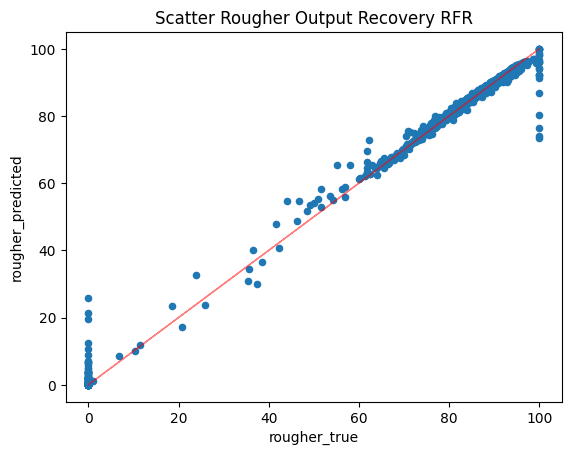

In [81]:
# Diagrama de dispersión de recuperación rougher RFR
rfr_rougher_p_v_df_test.plot(x = 'rougher_true', y = 'rougher_predicted', kind='scatter')
plt.plot(rfr_rougher_p_v_df_test.rougher_true, rfr_rougher_p_v_df_test.rougher_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Rougher Output Recovery RFR")
plt.show()

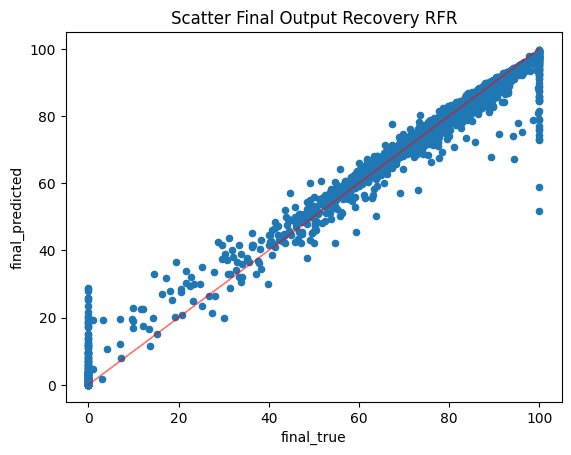

In [82]:
# Diagrama de dispersión de recuperación final RFR
rfr_final_p_v_df_test.plot(x = 'final_true', y = 'final_predicted', kind='scatter')
plt.plot(rfr_final_p_v_df_test.final_true, rfr_final_p_v_df_test.final_true, color = 'red', alpha = .5, linewidth = 1)
plt.title("Scatter Final Output Recovery RFR")
plt.show()

In [83]:
# Aplicación de función cross_valid_scoring
rfr_metrics_median_df_test = cross_valid_scoring (rfr_model_appd_test, features_test_scld, target_test, rfr_predicted_test, 5)
rfr_metrics_median_df_test

,Metric,Rougher,Final
0,MAX ERROR,92.16,73.97
1,MAE,1.07,3.07
2,RMSE,6.10,7.54
3,R2,0.93,0.90
4,sMAPE,0.56,11.21


<div class="alert alert-block alert-success"> <b>Celda [83]</b> <a class="tocSkip"></a> Correcta aplicación del modelo entrenado al conjunto de prueba. Buena práctica replicar el preprocesamiento (PCA y escalado) en los datos de test antes de usar el modelo. </div>

In [84]:
# Comparación de métricas para determinar el sobreajuste o subajuste
comparisson = rfr_metrics_median_df_test.merge(rfr_metrics_median_df, on='Metric', suffixes=('_test', '_traning'))
comparisson

,Metric,Rougher_test,Final_test,Rougher_traning,Final_traning
0,MAX ERROR,92.16,73.97,96.08,90.48
1,MAE,1.07,3.07,0.20,2.86
2,RMSE,6.10,7.54,2.66,7.01
3,R2,0.93,0.90,0.99,0.95
4,sMAPE,0.56,11.21,0.25,6.48


<div class="alert alert-block alert-success"> <b>Celda [84]</b> <a class="tocSkip"></a> Excelente comparación entre métricas de entrenamiento y prueba. Este análisis permite detectar sobreajuste y evaluar la robustez del modelo. Muy bien estructurada la tabla de comparación. </div>

Comentarios Sección 3. 

3.1 Se define la función de sMAPE. Que se integra en una función definida posteriormente (cross_valid_scoring), para las evaluaciones de métricas por cada modelo.

3.1.1. Del mismo modo que el proceso de PCA (después de una evaluación de modelos con los datos originales), se elige realizar el escalamiento de datos para el mejoramiento de resultados en los modelos.

3.2 Se presentan 4 modelos para determinar cuál se adapta mejor a la información. En todos los casos se define una función para su aplicación y resumen de información, así como el gráfico de recuperación en su etapa Rougher y Final.

3.3 La evaluación de los modelos se lleva a cabo aplicando la función cross_valid_scoring que contempla el Error Máximo, EAM, RMSE, R2 y sMAPE. Se presenta la información en 4 DFs.

Debido que el Bosque aleatorio de regresión arroja los mejores resultados, se elige para su mejoramiento y aplicación al conjunto de prueba.

3.3.1 Con ayuda de bucle for se investigan los hiperparámetros para reconfigurar el modelo y obtener mejores evaluaciones en las métricas y posteriormente la aplicación al conjunto de prueba.

3.4 Se configuran los datos del conjunto de prueba como los del conjunto de entrenamiento (PCA y escalado) y la aplicación del modelo elegido.

3.5 Se obtiene un mínimo nivel de sobreajuste en el modelo, sin representar complicaciones para la aplicación del mismo.

<div class="alert alert-block alert-success"> <b>Comentario final</b> <a class="tocSkip"></a> Oscar, tu proyecto demuestra un enfoque metódico y sólido en ciencia de datos. Has implementado correctamente todo el flujo: carga, inspección, ingeniería de atributos, reducción de dimensionalidad, modelado y evaluación.
    
✅ Fortalezas notables:

Buen uso de visualizaciones para respaldar tus análisis.

Implementación coherente y reutilizable de funciones de modelado.

Aplicación de PCA para detección de outliers, bien argumentada.

Evaluación completa con validación cruzada y múltiples métricas.

Justificación clara y comparativa en la elección del modelo final.


⚠️ Áreas a fortalecer:

Evitar el uso de imputación ciega con ceros en valores faltantes, especialmente en variables donde el cero no es significativo.

Incluir visualizaciones y métricas de desempeño para todos los modelos (por ejemplo, Random Forest antes de la validación cruzada).

Aunque la reducción por PCA fue útil, convendría evaluar también su impacto en la pérdida de información y desempeño diferencial por etapa (rougher vs final).

En conjunto, este proyecto refleja un muy buen dominio técnico y criterio analítico. Con algunos ajustes menores, alcanzaría un nivel excelente tanto en profundidad como en presentación.

¡Buen trabajo, Oscar!

</div>